# pour le lieu x  dans quel chanson apparait-il ?

In [4]:
#ouverture et lecture des json
import json
def ouvrir_json(chemin):
    f = open(chemin, encoding="utf-8")
    toto = json.load(f)
    f.close()
    return toto

def ecrire_fichier(chemin, contenu):
  w = open(chemin, "w", encoding="utf-8")
  w.write(contenu)
  w.close()
def lire_fichier(chemin):
  f = open(chemin, "r", encoding="utf-8")
  chaine = f.read()
  f.close()
  return chaine
def Splittxt(txt):
    tokenizer = nltk.RegexpTokenizer(r"(\w+,\w+|\w+-\w+|\w+\.\w+\.\w+|\w+\S|\w+|\S|\w+\S|\?|\!)")
    txt_split = tokenizer.tokenize(txt)
    return txt_split
def Splittxt2(txt):
    tokenizer = nltk.RegexpTokenizer(r"(\w+'|\w+\S\w+|\w+-\w+|\w+|\S|\w+\S)")
    txt_split = tokenizer.tokenize(txt)
    return txt_split

In [7]:
#pour afficher paroles des chansons du fichier echantillon1.json

import json
i = ouvrir_json("echantillon1.json")
start = i["_all/"]
#j'ai créer une liste vide pour regrouper tous les listes de txt (chaque txt et dans une liste)
tous_les_txt = []
for element in start:
    liste_txt = []
    txt = element["lyrics"]
    titre = element["full_title"]
    liste_txt.append(txt)
    tous_les_txt.append(liste_txt)
    print(titre)
    print(liste_txt, "-"*70)
print(tous_les_txt)

Mini, Mini, Mini by Jacques Dutronc
["Petit, petit, petit\nTout est mini dans notre vie\nMini-moke et mini-jupe\nMini-moche et lilliput\nIl est mini Docteur Schweitzer\nMini mini ça manque d'air\nMini-jupe et mini-moque\nMiniature de quoi j'me moque\nMinistère et terminus\nMinimum et minibus\n\nPetit, petit, petit\nTout est mini dans notre vie\nMini-moke et mini-jupe\nMini-moche et lilliput\nIl est mini Docteur Schweitzer\nMini mini ça manque d'air\nMini, mini, mini\nMini, mini, mini, mini\n\nMoi je préfère les maxis\nMaxi-moke et maxi-jupe\nMaxi-moche et maxi-pute\nIl est maxi Docteur Schweitzer\nMaxi maxi ça respire l'air\nMaxitère et termaxus\nMaximum et maxibus\nMaxistère et termaxus\nMaximum et maxibus\nMaxistère et termaxus"] ----------------------------------------------------------------------
Et Moi, Et Moi, Et Moi by Jacques Dutronc
["Sept cent millions de chinois\nEt moi, et moi, et moi\nAvec ma vie, mon petit chez-moi\nMon mal de tête, mon point au foie\nJ'y pense et puis j

# création d'une liste des lieux de paris

In [2]:

import glob
import re

chemin = glob.glob('lieux_paris/*/*')
vrai_entite_nomme = []
dic_lieu = {}
for i in chemin:
    lieux_de_paris = ouvrir_json(i)
    for lieu in lieux_de_paris:
        #print(lieu)
        vrai_entite_nomme.append(lieu)


In [9]:
import json
#voc_glaff = []
with open("freq_glaff_10000.json") as f:
    dic = json.load(f)
    print(len(dic))
    voc_glaff = set(dic.keys()) 
    print(len(voc_glaff))

mot = "météoriser"
if mot in voc_glaff:
    print(mot)

1082688
1082688
météoriser


In [10]:
import nltk
chanson = []
for element in start:
    liste = []
    txt = element["lyrics"]
    try:
        for l in txt.split("\n"):
            #lignes_chanson.append(l)
            liste.append(l)
        chanson.append(liste) #lignes_chanson.append([l])
    except:
        chanson.append(["None"])
        
print(len(chanson))
FP = 0 # On a modifié et on a eu tord
VP = 0 # On a modifié et on a eu raison
FN = 0 # On a pas modifié et on a eu tord
VN = 0 # On a pas modifié et on a eu raison.

#print(chanson)
count = -1
for liste_lignes_chanson in chanson:
    count += 1
    for ligne in liste_lignes_chanson:
        #print(ligne)
        expr = re.compile("^(\w+'|\w+-\w+|\w+)")
        match = expr.finditer(ligne)
        #ici je créer une expression pour récuperer tous les mots en début de ligne, 
        #certain commençant par "j'" ou "c'" d'autre par un tiret "un-mot", je ne sais pas s'il y a
        #d'autre mot différent.
    #------------------------------------------------------------------------------------------------------------ 
        for m in match:
            mot = m.group(0) #la variable mot prend la chaine de caractère trouvé par mon match.
            #print(""" "{}"  dans : "{}" """.format(mot, z)) #affiche le mot dans quel ligne il se trouve.
            toto = False
            if mot[0] != mot[0].lower():
                toto = True
            #if mot.istitle(): #si le mot possède une majuscule je le met sans maj. minimoke not istitle()
            if toto == True:
                mot_lower = mot.lower()
                #print(mot)
    #------------------------------------------------------------------------------------------------------------
                if mot_lower in voc_glaff:                 #s'il est dans le glaff et qu'il correspond 
                    #print("le mot est dans glaff")   #a un lieu de ma liste des lieux
                    if mot in vrai_entite_nomme:     #SINON je l'affiche .
                        print("le mot est un nugget\n ")
                        FP += 1
                    else:
                        #print("je suis pas un nugget\n ")
                        liste_mots = Splittxt2(ligne)      #permet de découper ma ligne en liste de mot.
                        liste_mots[0] = mot_lower            #le mot en début de ligne je le remplace par mot.
                        nouvelle_ligne = " ".join(liste_mots)  #je reassemble ma ligne.
                        nouvelle_ligne = re.sub("\'\s", "\'", nouvelle_ligne)
                        #print(lignes_chanson, "\n")
                        res = [elem.replace(ligne,nouvelle_ligne) for elem in liste_lignes_chanson]  #je remplace 
                        VP += 1
                        liste_lignes_chanson = res   #l'ancienne ligne par une nouvelle ligne.  #VP 
                        chanson[count] = liste_lignes_chanson
                    

                        
    #------------------------------------------------------------------------------------------------------------

                elif mot_lower not in voc_glaff:#s'il est pas dans le glaff je fait le même procédé ↑.

                    #print("le mot est pas dans glaff \n ")#ne pas mettre en minuscule. #FN
                    #match = [i for i in vrai_entite_nomme]
                    if mot not in vrai_entite_nomme:
                        #print("pas dans lieu de paris")
                        FN += 1
                    else:
                        #print("je suis un lieu de paris \n ")
                        VN += 1

#print(chanson)
#print(count)
print(len(chanson))


92
le mot est un nugget
 
le mot est un nugget
 
92


# Enregistrer les chansons dans un json.

In [74]:
comptage = 0

num_chanson = []

for i in chanson:
    m = []
    nv_echantillon = "\n".join(i)
    m.append(nv_echantillon)
    #print(m)
    #num_chanson.append(nv_echantillon)
    num_chanson.append(m)
    #print(num_chanson[comptage])
        
    #print(num_chanson[comptage], "\n")
        
        
#print(num_chanson[0])    
Dic_nouvelle_chansons = {}
#Dic_nouvelle_chansons.setdefault()

#Dic_nouvelle_chansons["all"]["Titre_chanson"] = {}
#Dic_nouvelle_chansons["all"]["Auteur"]
#Dic_nouvelle_chansons["all"]["lyrics"] = {}

#Dic_nouvelle_chansons["Titre_chanson"] = {}
#Dic_nouvelle_chansons["lyrics"] = {}
for elem in start:
    #Dic_nouvelle_chansons.setdefault()
    Dic_nouvelle_chansons["all"] = {}
    titre = elem["full_title"]
    try:
        artiste = elem["album"]["artist"]["name"]
    except:
        artiste = "none"
    if titre not in Dic_nouvelle_chansons:
        Dic_nouvelle_chansons["all"]["Titre_chanson"] = titre
        #print(Dic_nouvelle_chansons)
        Dic_nouvelle_chansons["all"]["Auteur"] = artiste
        Dic_nouvelle_chansons["all"]["lyrics"] = num_chanson[comptage]
        comptage += 1

#with open("Data/nouvel_echantillon.json", "w") as w:
    #w.write(json.dumps(Dic_nouvelle_chansons, indent=2))
print(Dic_nouvelle_chansons)

{'all': {'Titre_chanson': 'Hippie hippie hourrah - remastered by\xa0Jacques\xa0Dutronc', 'Auteur': 'none', 'lyrics': ['none']}}


# Exemple qui fonctionne

In [16]:
dicoooooooo = {}
count = 0 
for elem in start:
    titre = elem["full_title"]
    dicoooooooo[titre] = {}
    dicoooooooo[titre]["lyrics"] =  {}
    dicoooooooo[titre]["lyrics"] = num_chanson[count]
    count += 1
    
print(dicoooooooo)



{'Mini, Mini, Mini by\xa0Jacques\xa0Dutronc': {'lyrics': ["petit , petit , petit\ntout est mini dans notre vie\nMini-moke et mini-jupe\nMini-moche et lilliput\nil est mini Docteur Schweitzer\nmini mini ça manque d'air\nMini-jupe et mini-moque\nminiature de quoi j'me moque\nministère et terminus\nminimum et minibus\n\npetit , petit , petit\ntout est mini dans notre vie\nMini-moke et mini-jupe\nMini-moche et lilliput\nil est mini Docteur Schweitzer\nmini mini ça manque d'air\nmini , mini , mini\nmini , mini , mini, mini\n\nmoi je préfère les maxis\nMaxi-moke et maxi-jupe\nMaxi-moche et maxi-pute\nil est maxi Docteur Schweitzer\nmaxi maxi ça respire l'air\nMaxitère et termaxus\nmaximum et maxibus\nMaxistère et termaxus\nmaximum et maxibus\nMaxistère et termaxus"]}, 'Et Moi, Et Moi, Et Moi by\xa0Jacques\xa0Dutronc': {'lyrics': ["sept cent millions de chinois\net moi , et moi , et moi\navec ma vie , mon petit chez-moi\nmon mal de tête , mon point au foie\nJ'y pense et puis j'oublie\nc'est l

# Pour un lieu quel artiste en parle.

In [181]:
import os
dic_interro = {}

if os.path.exists("Data/Dictionnaire_artiste_to_lieux_paris_large.json"):
    with open("Data/Dictionnaire_artiste_to_lieux_paris_large.json", encoding="UTF-8") as f:
        a = json.load(f)
        for i, c in a.items():
            #print(c[0])
            dic_interro[i] = c
        
else:
    for element in start:
        txt = element["lyrics"]
        #print(element.keys())
        titre = element["full_title"]
        try:
            artiste = element["album"]["artist"]["name"]
        except:
            continue
        date = element["release_date"]
        dic_interro.setdefault(artiste, [])
        if 2>1 :
            try:
                doc = nlp(txt)
                liste_temporaire = []
                for ent in doc.ents:
                        if ent.label_ == "LOC":
                            locatif = ent.text
                            #print(locatif)
                            liste_temporaire.append(locatif)
                if locatif in dic_interro:
                    print("deja dans le dictionnaire") #problème le nom de l'artiste existe deja comment l'ajouter au dictionnaire ?
                else:
                    #print(type(liste_temporaire[0]))
                    dic_interro[artiste].append([titre, date, liste_temporaire])


            except:
                pass

#print(dic_interro)
T = dic_interro.values()
for artiste, T in dic_interro.items():
    #print(T)
    #nb_nom_paris = len([x for x in T if len x[2]==0])
    nb_total_chanson = len(T)
    print(nb_total_chanson)
dic_interro["Tiago"] = [
    ["oui oui baguette", 1900, ["Maxitère", 'Trocadéro']],
    ["carolina panthers", 2020, ["Trocadéro", "Pont de Neuilly"]],
    ["truc de ouf", 2020, ["Trocadéro", "Paris"]]
]
print(dic_interro)
#with open("Data/Dictionnaire_artiste_to_lieux_paris_large.json", "w") as w:
    #w.write(json.dumps(dic_interro, indent=2))

34
{'Jacques Dutronc': [['Mini, Mini, Mini by\xa0Jacques\xa0Dutronc', None, ['Ministère', 'Minimum', 'Maxitère']], ['Et Moi, Et Moi, Et Moi by\xa0Jacques\xa0Dutronc', None, ['Canigou']], ['Les Cactus by\xa0Jacques\xa0Dutronc', None, ['A']], ['Fais Pas Ci, Fais Pas Ça by\xa0Jacques\xa0Dutronc', None, []], ["J'aime les filles by\xa0Jacques\xa0Dutronc", '1967-01-01', ['Mégève', 'Saint-Tropez', "Camaret\nJ'aime les filles intellectuelles"]], ['Hippie Hippie Hourrah by\xa0Jacques\xa0Dutronc', None, ['San Francisco\n\nJe suis hippie', 'Ca']], ['La Fille Du Père Noël by\xa0Jacques\xa0Dutronc', None, []], ['Le Responsable by\xa0Jacques\xa0Dutronc', None, ["Parc'"]], ['On Nous Cache Tout, On Nous Dit Rien by\xa0Jacques\xa0Dutronc', None, []], ["L'Idole (Je N'En Peux Plus) by\xa0Jacques\xa0Dutronc", None, ['Celles', 'Celles']], ["J'ai déjà donné by\xa0Jacques\xa0Dutronc", None, []], ["L'Espace D'Une Fille by\xa0Jacques\xa0Dutronc", None, []], ['Les Rois De La Réforme by\xa0Jacques\xa0Dutronc', N

In [195]:
#somme globale. = pour un lieu qui est l'auteur qui a le plus parlé?
    #print()
dico_des_lieux = {}


for cle,valeur in dic_interro.items():
    #dico_en = {}
    for i in range(len(valeur)):
        #print(valeur[i][2])
        
        for entite in valeur[i][2]:
            print(entite, "-> ",cle)
            dico_des_lieux.setdefault(entite, {})
            #if cle not in dico_des_lieux.items():
            dico_des_lieux[entite][cle] = 1
            #else:
        dico_des_lieux[entite][cle] += 1

print(dico_des_lieux)

Ministère ->  Jacques Dutronc
Minimum ->  Jacques Dutronc
Maxitère ->  Jacques Dutronc
Canigou ->  Jacques Dutronc
A ->  Jacques Dutronc
Mégève ->  Jacques Dutronc
Saint-Tropez ->  Jacques Dutronc
Camaret
J'aime les filles intellectuelles ->  Jacques Dutronc
San Francisco

Je suis hippie ->  Jacques Dutronc
Ca ->  Jacques Dutronc
Parc' ->  Jacques Dutronc
Celles ->  Jacques Dutronc
Celles ->  Jacques Dutronc
Val-de-Grâce ->  Jacques Dutronc
Ca ->  Jacques Dutronc
Vieux ->  Jacques Dutronc
Varsovie ->  Jacques Dutronc
Baltimore ->  Jacques Dutronc
Yaoundé ->  Jacques Dutronc
Amsterdam ->  Jacques Dutronc
Bornéo ->  Jacques Dutronc
Papeete ->  Jacques Dutronc
Bordeaux ->  Jacques Dutronc
Tampico ->  Jacques Dutronc
Calcutta ->  Jacques Dutronc
Téhéran ->  Jacques Dutronc
Saana ->  Jacques Dutronc
Cotonou ->  Jacques Dutronc
Dôle ->  Jacques Dutronc
Lourdes ->  Jacques Dutronc
Créteil ->  Jacques Dutronc
Port-Gentil ->  Jacques Dutronc
Tripoli ->  Jacques Dutronc
Varsovie ->  Jacques Dutr

In [ ]:
#somme globale. = pour un lieu qui est l'auteur qui a le plus parlé?
    #print()
dico_des_lieux = {}


for cle,valeur in dic_interro.items():
    #dico_en = {}
    for i in range(len(valeur)):
        #print(valeur[i][2])
        dico_tempo = {}
        for entite in valeur[i][2]:
            #print(entite)
            dico_des_lieux.setdefault(entite, {})
            if cle not in dico_tempo.items():
                dico_tempo[cle] = 1
            else:
                dico_tempo[cle] += 1
            print(dico_tempo)
        dico_des_lieux[entite] = dico_tempo

print(dico_des_lieux)

In [175]:
tograph2 = {}
l = "Tiago"
tograph2[l] = {}
for cle, valeur in dico_des_lieux.items():
    dico_du_dico = dico_des_lieux[cle]
    for c, v in dico_du_dico.items():
        if c == l:
            tograph2[l][cle] = v
            #print("true")
print(tograph2)

{'Tiago': {'Maxitère': 1, 'Trocadéro': 1, 'Pont de Neuilly': 1, 'Troocadéro': 1}}


In [170]:
for cle, valeur in tograph2.items():
    g = tograph2[cle]
    print(g)

{'Maxitère': 1, 'Trocadéro': 1, 'Pont de Neuilly': 1, 'Troocadéro': 1}


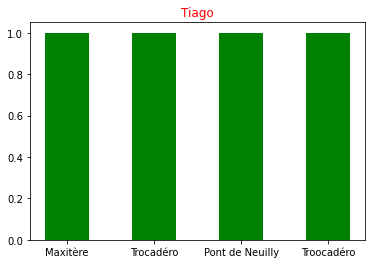

In [171]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
for cle, valeur in tograph2.items():
    g = tograph2[cle]
    x = g.keys()
    height = g.values()
    width = 0.50
    #x2 = plt.xlabel(x,color="r")
    #plt.ylabel(height,color="r")
    plt.title(cle, color='r')
    plt.bar(x, height, width, color='green')
    
    #plt.savefig('Data/image_large/%s.png'%cle)
    plt.show()       


## regrouper le nombre d'apparition des lieux